**Topic: Exploring Univariate and bivariate Analysis with a Chosen Dataset**

**Activity Objective:**
To apply univariate analysis techniques to a self-selected dataset, gaining hands-on experience in data exploration, visualization, and interpretation.

Task Breakdown:
Step 1: Dataset Selection (Day 1):

Ask students to choose a dataset of their interest from a reliable source or dataset repository. It could be related to any domain such as social sciences, economics, health, sports, etc.
Encourage students to ensure the dataset has at least one categorical variable and one continuous variable.
Step 2: Data Exploration and Summary (Day 2-3):

Instruct students to load the dataset into a tool like Python (using libraries like pandas) or any other statistical software.
Have them perform initial data exploration tasks:
Display summary statistics (mean, median, mode, etc.) for the continuous variable.
Count unique categories and percentages for the categorical variable.
Identify missing values and decide on a strategy to handle them.



Step 3: Visualization (Day 4-5):

Guide students to create appropriate visualizations for both the continuous and categorical variables:
Histogram, box plot, and density plot for the continuous variable.
Bar chart or pie chart for the categorical variable.

Step 4: Interpretation and Inference (Day 6-7):

Ask students to analyze and interpret the insights gained from the summary statistics and visualizations.
Have them make initial inferences about relationships between the variables and potential patterns.

Step 5: Peer Review and Discussion (Day 8-9):
Organize a peer review session where students share their findings with each other.
Encourage constructive feedback and discussions on different datasets and insights.

Step 6: Presentation (Day 10-12):
Assign each student a short presentation slot to showcase their dataset, analysis, and insights to the class.
Encourage questions and discussions after each presentation.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape, df.dtypes

((768, 9), Pregnancies                   int64
 Glucose                       int64
 BloodPressure                 int64
 SkinThickness                 int64
 Insulin                       int64
 BMI                         float64
 DiabetesPedigreeFunction    float64
 Age                           int64
 Outcome                       int64
 dtype: object)

In [ ]:
df['Outcome']=df['Outcome'].astype('bool')
df.dtypes['Outcome']

dtype('bool')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Basic Summary :
Data is related to healthcare Industry having 768 observations with 9 variable. Target variable is Outcome. It looks like there is no missing value, and boolean, float , integers are different datatypes available. Well descriptive analysis shows that variable Glucose, BoodPressure,SckinThickness, Insulin and BMI have minimum value 0 which does not make any sense, these values are either missing or outliers, I will be treating them later. I can see in Pregnancies column, minimum is 0 (May be this is sign for no pregnancy) which is considerable, But maximum month of pregnancy is 17 which does not make any sense, I will be dealing later. Variance among different predictor variable is varying at large scale , Scaling data will be helpful for Predective modelling.

In [ ]:
preg_proportion = np.array(df['Pregnancies'].value_counts())
preg_month = np.array(df['Pregnancies'].value_counts().index)
preg_proportion_perc = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)

In [ ]:
preg = pd.DataFrame({'month':preg_month,'count_of_preg_prop':preg_proportion,'percentage_proportion':preg_proportion_perc})
preg.set_index(['month'],inplace=True)
preg.head(10)

,count_of_preg_prop,percentage_proportion
month,,
1,135,17
0,111,14
2,103,13
3,75,9
4,68,8
5,57,7
6,50,6
7,45,5
8,38,4


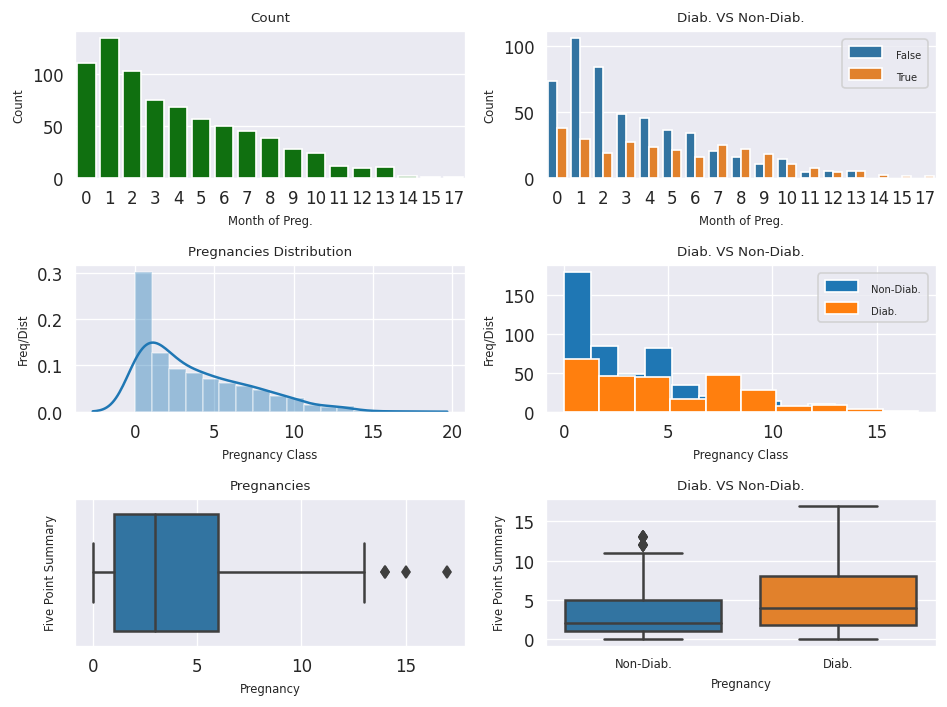

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.countplot('Pregnancies',data=df,ax=axes[0][0],color='green')
axes[0][0].set_title('Count',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.countplot('Pregnancies',data=df,hue='Outcome',ax=axes[0][1])
axes[0][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()


plot10 = sns.distplot(df['Pregnancies'],ax=axes[1][0])
axes[1][0].set_title('Pregnancies Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()


plot11 = df[df['Outcome']==False]['Pregnancies'].plot.hist(ax=axes[1][1],label='Non-Diab.')
plot11_2=df[df['Outcome']==True]['Pregnancies'].plot.hist(ax=axes[1][1],label='Diab.')
axes[1][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plot11.axes.legend(loc=1)
plt.setp(axes[1][1].get_legend().get_texts(), fontsize='6') # for legend text
plt.setp(axes[1][1].get_legend().get_title(), fontsize='6') # for legend title
plt.tight_layout()



plot20 = sns.boxplot(df['Pregnancies'],ax=axes[2][0],orient='v')
axes[2][0].set_title('Pregnancies',fontdict={'fontsize':8})
axes[2][0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=axes[2][1])
axes[2][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[2][1].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
plt.tight_layout()
plt.show()

Understanding Distribution
The distribution of Pregnancies in data is unimodal and skewed to the right, centered at about 1 with most of the data between 0 and 15, A range of roughly 15, and outliers are present on the higher end.

In [ ]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

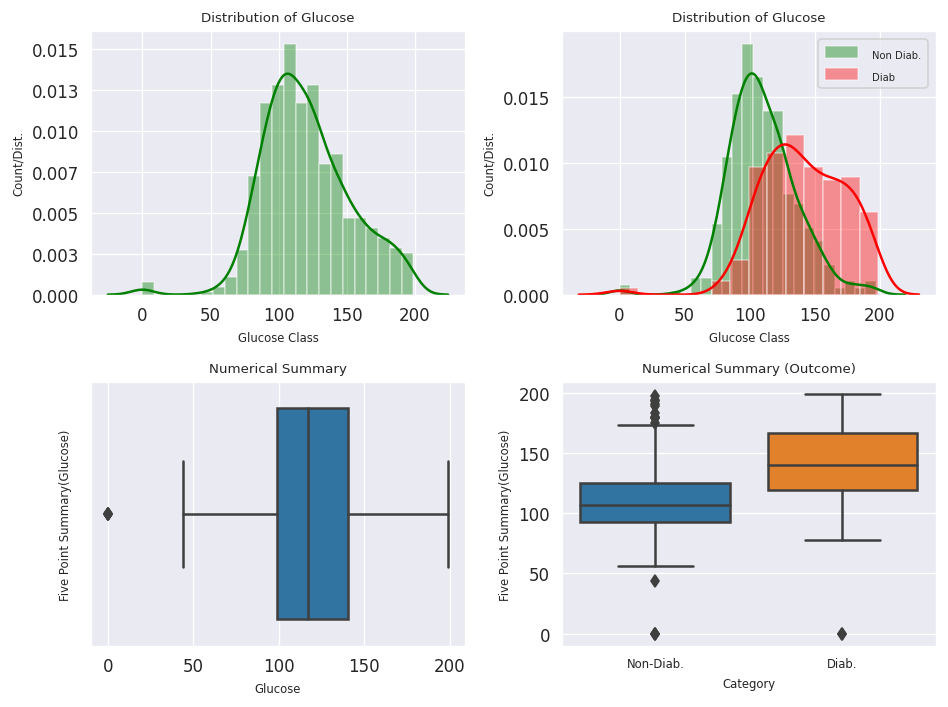

In [ ]:
#sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))


plot00=sns.distplot(df['Glucose'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(df[df['Outcome']==False]['Glucose'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(df[df.Outcome==True]['Glucose'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(df['Glucose'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='Glucose',data=df,ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

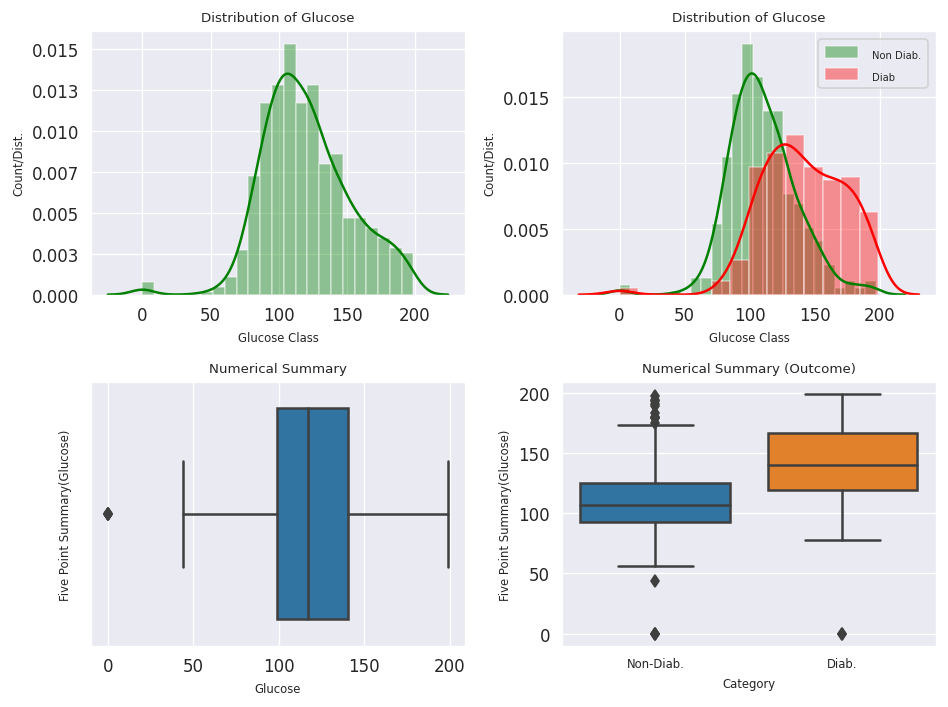

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))


plot00=sns.distplot(df['Glucose'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(df[df['Outcome']==False]['Glucose'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(df[df.Outcome==True]['Glucose'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(df['Glucose'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='Glucose',data=df,ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

The distribution of Glucose level among patients is unimodal and roughly bell shaped, centered at about 115 with most of the data between 90 and 140, A range of roughly 150, and outliers are present on the lower end(Glucose ==0).

Note :- BoxPlot of both categories shows that People with higher Glucose level have higher risk of Diabetes (There is not statistical evidence, May be i will be testing a hypothesis in my 3rd notebook of this data.) We can also see that some outliers are present on non diabetic patient observation.

Let us verify distribution by keeping only non zero entry of Glucose

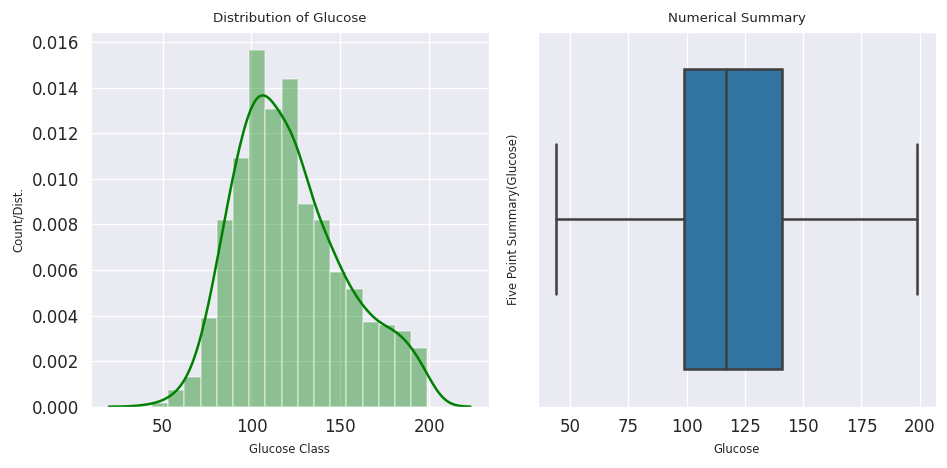

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Glucose']!=0]['Glucose'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Glucose']!=0]['Glucose'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

In [ ]:
df.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

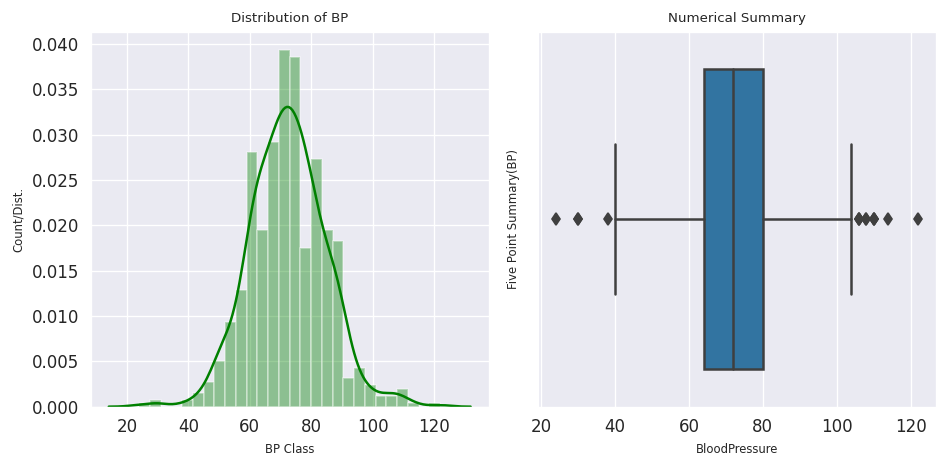

In [ ]:

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('BloodPressure',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()

In [ ]:
df.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

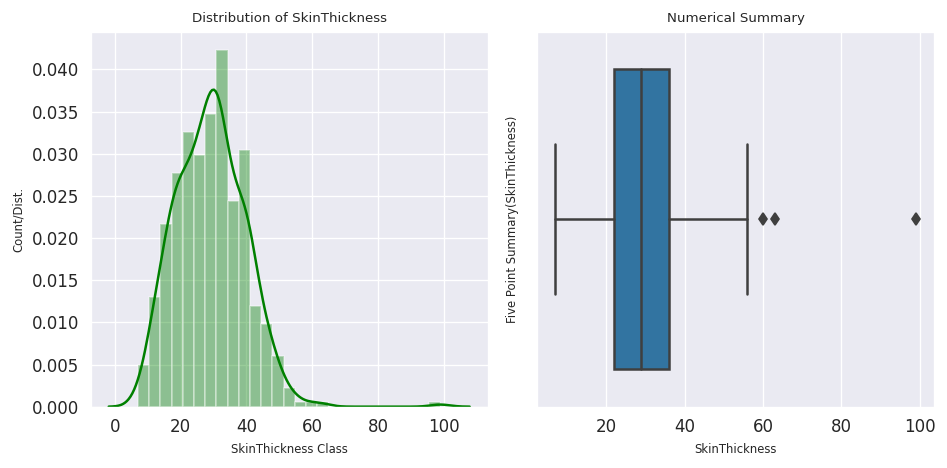

In [ ]:
from matplotlib.ticker import FormatStrFormatter

sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))


plot0=sns.distplot(df[df['SkinThickness']!=0]['SkinThickness'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['SkinThickness']!=0]['SkinThickness'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('SkinThickness',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(SkinThickness)',fontdict={'fontsize':7})
plt.tight_layout()
